## NAIVE BAYES

In [ ]:
from PIL import Image

In [ ]:
# Naive Bayes for IMDB Sentiment Analysis

from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn import metrics

from keras.datasets import imdb
import numpy as np

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

word_index = imdb.get_word_index()
index_to_word = {v+3: k for k, v in word_index.items()}
index_to_word[0] = "<PAD>"
index_to_word[1] = "<START>"
index_to_word[2] = "<UNK>"
index_to_word[3] = "<UNUSED>"

def decode_review(encoded_review):
    return " ".join([index_to_word.get(i, "?") for i in encoded_review])

X_train_text = [decode_review(x) for x in X_train]
X_test_text = [decode_review(x) for x in X_test]

# Build Pipeline (Preprocess + Train Naive Bayes)
text_clf = Pipeline([
    ('vect', CountVectorizer(max_features=10000, stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])

text_clf.fit(X_train_text, y_train)

y_pred = text_clf.predict(X_test_text)

print("Evaluating Naive Bayes model...\n")

print("--- Naive Bayes Results ---")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(metrics.classification_report(y_test, y_pred, target_names=['negative', 'positive']))


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Evaluating Naive Bayes model...

--- Naive Bayes Results ---
Accuracy: 0.8372

Classification Report:

              precision    recall  f1-score   support

    negative       0.82      0.87      0.84     12500
    positive       0.86      0.81      0.83     12500

    accuracy                           0.84     25000
   macro avg       0.84      0.84      0.84     25000
weighted avg       0.84      0.84      0.84     25000



## FAST FORWARD NEURAL NETWORK

In [ ]:
# Feedforward Neural Network (FFNN) for IMDB Sentiment Analysis

import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten
from tensorflow.keras.optimizers import Adam

max_features = 10000
max_len = 200

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)

X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

model = Sequential()
model.add(Embedding(max_features, 128, input_length=max_len))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=64,
                    validation_split=0.2,
                    verbose=1)

loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("\n--- Feedforward Neural Network Results ---")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Loss: {loss:.4f}")


Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 52ms/step - accuracy: 0.6887 - loss: 0.5490 - val_accuracy: 0.8674 - val_loss: 0.3104
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 51ms/step - accuracy: 0.9729 - loss: 0.0870 - val_accuracy: 0.8410 - val_loss: 0.4249
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 51ms/step - accuracy: 0.9985 - loss: 0.0107 - val_accuracy: 0.8430 - val_loss: 0.5171
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 54ms/step - accuracy: 0.9999 - loss: 0.0016 - val_accuracy: 0.8474 - val_loss: 0.5194
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 48ms/step - accuracy: 1.0000 - loss: 4.0506e-04 - val_accuracy: 0.8490 - val_loss: 0.5352

--- Feedforward Neural Network Results ---
Test Accuracy: 0.8503
Test Loss: 0.5577


## RECURRENT NEURAL NETWORK

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 94ms/step - accuracy: 0.6507 - loss: 0.5991 - val_accuracy: 0.7582 - val_loss: 0.4967
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 30s 94ms/step - accuracy: 0.8593 - loss: 0.3393 - val_accuracy: 0.5964 - val_loss: 0.6526
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 29s 94ms/step - accuracy: 0.7224 - loss: 0.5377 - val_accuracy: 0.6756 - val_loss: 0.6370
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 91ms/step - accuracy: 0.8974 - loss: 0.2677 - val_accuracy: 0.7256 - val_loss: 0.6861
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 94ms/step - accuracy: 0.9313 - loss: 0.1783 - val_accuracy: 0.7454 - val_loss: 0.7310

--- Recurrent Neural Network Results ---
Test Accuracy: 0.7492
Test Loss: 0.7242

Classification Report:

              precision    recall  f1-score   support

    negative       0.76      0.72      0.74     12500
    positive       0.74      0.78      0.76     12500

    accuracy                           0.75     25000
   macro avg       0.75      0

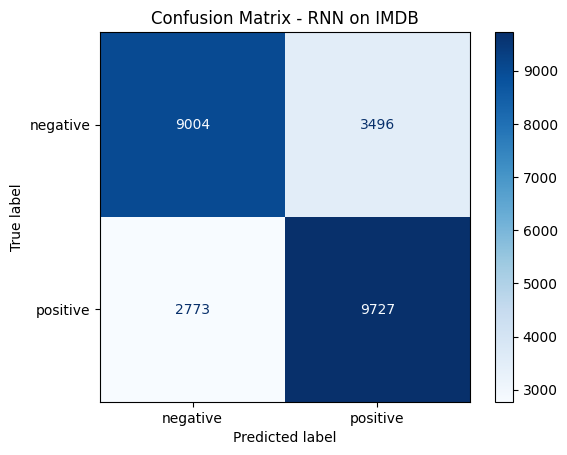

In [ ]:
# Recurrent Neural Network (RNN) for IMDB Sentiment Analysis

import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import numpy as np

max_features = 10000
max_len = 200

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)

X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

model = Sequential()
model.add(Embedding(max_features, 128, input_length=max_len))
model.add(SimpleRNN(64, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=64,
                    validation_split=0.2,
                    verbose=1)

loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("\n--- Recurrent Neural Network Results ---")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Loss: {loss:.4f}")

y_pred_probs = model.predict(X_test, verbose=0)
y_pred = (y_pred_probs > 0.5).astype("int32")

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=['negative', 'positive']))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['negative', 'positive'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - RNN on IMDB")
plt.show()


## LONG SHORT TERM MEMORY

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


313/313 ━━━━━━━━━━━━━━━━━━━━ 214s 672ms/step - accuracy: 0.6784 - loss: 0.5762 - val_accuracy: 0.8324 - val_loss: 0.3953
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 211s 672ms/step - accuracy: 0.8477 - loss: 0.3625 - val_accuracy: 0.8252 - val_loss: 0.4071
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 259s 665ms/step - accuracy: 0.8902 - loss: 0.2807 - val_accuracy: 0.8434 - val_loss: 0.3678
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 207s 661ms/step - accuracy: 0.9054 - loss: 0.2442 - val_accuracy: 0.8462 - val_loss: 0.4078
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 207s 661ms/step - accuracy: 0.9058 - loss: 0.2438 - val_accuracy: 0.8252 - val_loss: 0.4316

--- Long Short-Term Memory (LSTM) Results ---
Test Accuracy: 0.8278
Test Loss: 0.4308

Classification Report:

              precision    recall  f1-score   support

    negative       0.78      0.91      0.84     12500
    positive       0.89      0.75      0.81     12500

    accuracy                           0.83     25000
   macro avg       0.84  

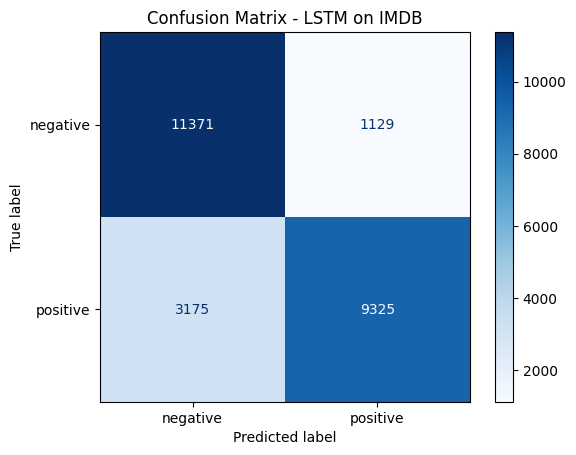

In [ ]:
# Long Short-Term Memory (LSTM) for IMDB Sentiment Analysis

import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import numpy as np

max_features = 10000
max_len = 200

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)

X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

model = Sequential()
model.add(Embedding(max_features, 128, input_length=max_len))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=64,
                    validation_split=0.2,
                    verbose=1)

loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("\n--- Long Short-Term Memory (LSTM) Results ---")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Loss: {loss:.4f}")

y_pred_probs = model.predict(X_test, verbose=0)
y_pred = (y_pred_probs > 0.5).astype("int32")

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=['negative', 'positive']))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['negative', 'positive'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - LSTM on IMDB")
plt.show()


## DistilBERT

In [ ]:
# DistilBERT for IMDB Sentiment Analysis

!pip install transformers datasets torch scikit-learn -q

from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification, Trainer, TrainingArguments
from datasets import load_dataset
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Step 1: Load Dataset
dataset = load_dataset("imdb")

# Step 2: Load Pretrained Tokenizer
tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")

# Tokenize Dataset
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=256)

tokenized_datasets = dataset.map(tokenize_function, batched=True)

# Step 3: Prepare Train & Test Sets
train_dataset = tokenized_datasets["train"].shuffle(seed=42).select(range(20000))  # smaller subset for faster training
test_dataset = tokenized_datasets["test"].shuffle(seed=42).select(range(5000))

# Step 4: Load Pretrained DistilBERT Model
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

# Step 5: Define Evaluation Metrics
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=-1)
    acc = accuracy_score(labels, preds)
    f1 = f1_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

# Step 6: Training Arguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=2,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=100,
)

# Step 7: Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

# Step 8: Train Model
trainer.train()

# Step 9: Evaluate Model
results = trainer.evaluate()
print("\n--- DistilBERT Results ---")
print(f"Accuracy: {results['eval_accuracy']:.4f}")
print(f"F1 Score: {results['eval_f1']:.4f}")

# Step 10: Confusion Matrix & Classification Report
predictions = trainer.predict(test_dataset)
y_pred = np.argmax(predictions.predictions, axis=-1)
y_true = predictions.label_ids

print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=['negative', 'positive']))

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['negative', 'positive'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - DistilBERT on IMDB")
plt.show()

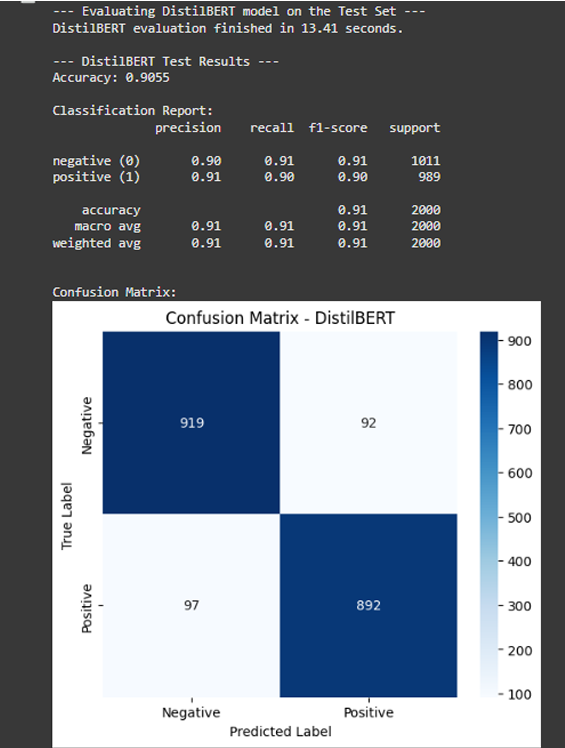

In [ ]:
img = Image.open('/content/b.png')
display(img)